# Importations et chargement des données Digit Mnist

## Introduction - Comparaison d'architectures CNN sur MNIST et Fashion-MNIST

Ce notebook explore **différentes architectures CNN** pour la classification d'images, en comparant leurs performances sur deux datasets classiques.

**Objectifs** :
- Évaluer l'impact de la profondeur du réseau
- Comparer différentes techniques de régularisation (Dropout, BatchNorm)
- Analyser les trade-offs complexité/performance
- Tester sur MNIST (chiffres) et Fashion-MNIST (vêtements)

**Architectures testées** :
1. CNN Basique (1 couche conv)
2. CNN Standard (2 couches conv)
3. CNN Profond (3 couches conv + BatchNorm)
4. CNN Avancé (techniques modernes)
5. CNN Séparable (convolutions efficaces)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape des données d'entraînement: (60000, 28, 28, 1)
Shape des données de test: (10000, 28, 28, 1)
Nombre de classes: 10


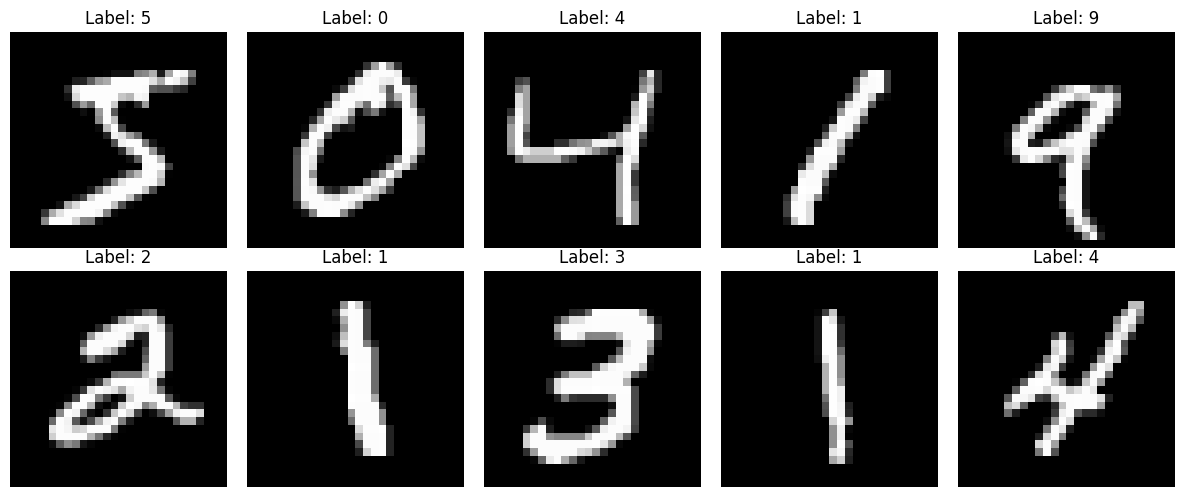

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Chargement du dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalisation et reshaping
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ajout d'une dimension pour les canaux (images en niveaux de gris)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Shape des données d'entraînement:", x_train.shape)
print("Shape des données de test:", x_test.shape)
print("Nombre de classes:", len(np.unique(y_train)))

# Affichage de quelques exemples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### Dataset MNIST - Chiffres manuscrits

**MNIST** est le "Hello World" du deep learning :
- 60 000 images d'entraînement + 10 000 de test
- Images 28×28 en niveaux de gris
- 10 classes (chiffres 0-9)
- Dataset relativement facile (accuracy >99% possible)

**Prétraitement** :
- Normalisation : Division par 255 → valeurs dans [0, 1]
- Reshape : Ajout dimension canal (28, 28, 1)

### Fonctions utilitaires pour l'évaluation

In [ ]:
def plot_training_history(history):
    """Affiche la courbe d'apprentissage"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend()

    plt.tight_layout()
    plt.show()

def evaluate_model(model, x_test, y_test):
    """Évalue le modèle et affiche les métriques"""
    # Prédictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Accuracy
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Rapport de classification
    print("\nRapport de Classification:")
    print(classification_report(y_test, y_pred_classes))

    return test_accuracy

### Fonctions d'évaluation

Ces fonctions permettent de :
- **plot_training_history** : Visualiser l'évolution de l'accuracy et de la loss pendant l'entraînement
- **evaluate_model** : Calculer les métriques finales, afficher la matrice de confusion et le rapport de classification

La **matrice de confusion** montre où le modèle se trompe (confusions entre classes).

## Architecture 1 - CNN Basique (1 couche)

=== ARCHITECTURE 1: CNN BASIQUE (1 COUCHE) ===
Description: Une seule couche de convolution + pooling


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8637 - loss: 0.4883 - val_accuracy: 0.9747 - val_loss: 0.0913
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9754 - loss: 0.0833 - val_accuracy: 0.9811 - val_loss: 0.0689
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9856 - loss: 0.0505 - val_accuracy: 0.9819 - val_loss: 0.0599
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9895 - loss: 0.0367 - val_accuracy: 0.9837 - val_loss: 0.0552
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0281 - val_accuracy: 0.9860 - val_loss: 0.0501

--- Évaluation Architecture 1 ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9860
Test Loss: 0.0424


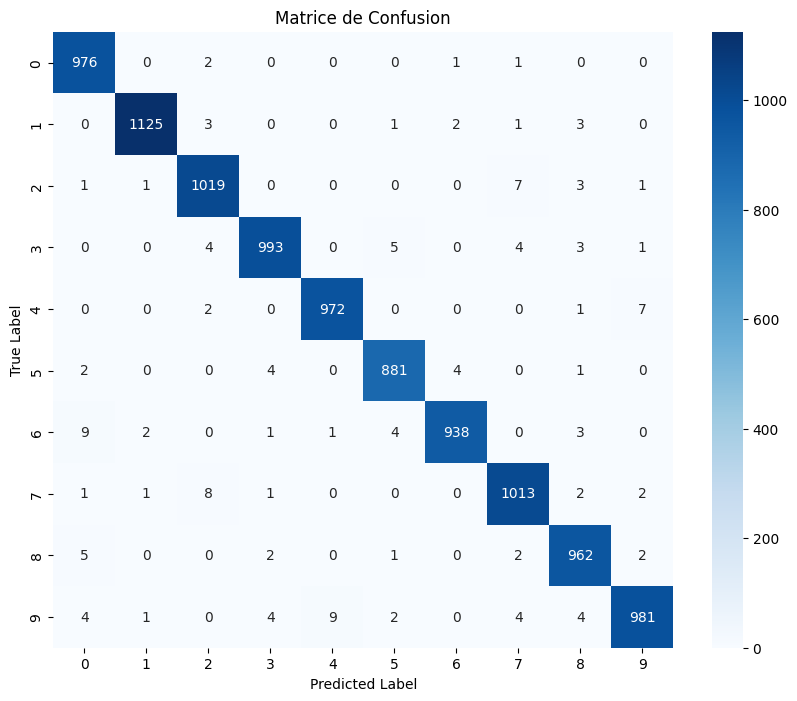


Rapport de Classification:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



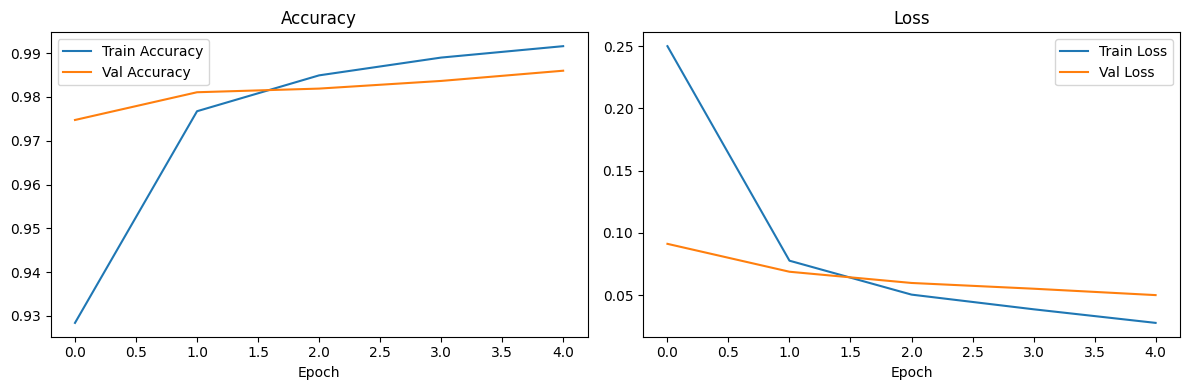

In [ ]:
print("=== ARCHITECTURE 1: CNN BASIQUE (1 COUCHE) ===")
print("Description: Une seule couche de convolution + pooling")

model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model1.summary()

# Entraînement
history1 = model1.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Évaluation
print("\n--- Évaluation Architecture 1 ---")
accuracy1 = evaluate_model(model1, x_test, y_test)
plot_training_history(history1)

### Architecture 1 - Le minimum viable

**Composition** :
- 1 couche Conv2D (32 filtres 3×3)
- 1 MaxPooling
- Flatten + Dense(128) + Dense(10)

**Caractéristiques** :
- ✅ Simple et rapide
- ✅ Peu de paramètres
- ⚠️ Capacité limitée pour features complexes

Cette architecture suffit souvent pour MNIST vu sa simplicité.

## Architecture 2 - CNN Standard (2 couches)

=== ARCHITECTURE 2: CNN STANDARD (2 COUCHES) ===
Description: Deux couches de convolution avec augmentation progressive des filtres


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7631 - loss: 0.7370 - val_accuracy: 0.9753 - val_loss: 0.0882
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9625 - loss: 0.1289 - val_accuracy: 0.9833 - val_loss: 0.0565
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9740 - loss: 0.0838 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0666 - val_accuracy: 0.9886 - val_loss: 0.0427
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9820 - loss: 0.0572 - val_accuracy: 0.9886 - val_loss: 0.0414

--- Évaluation Architecture 2 ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9894
Test Loss: 0.0313


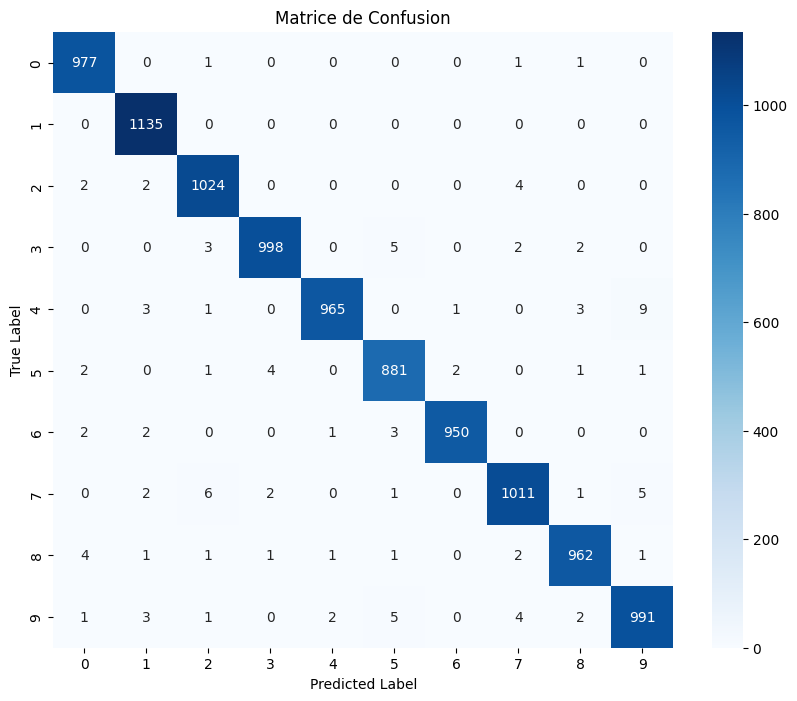


Rapport de Classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



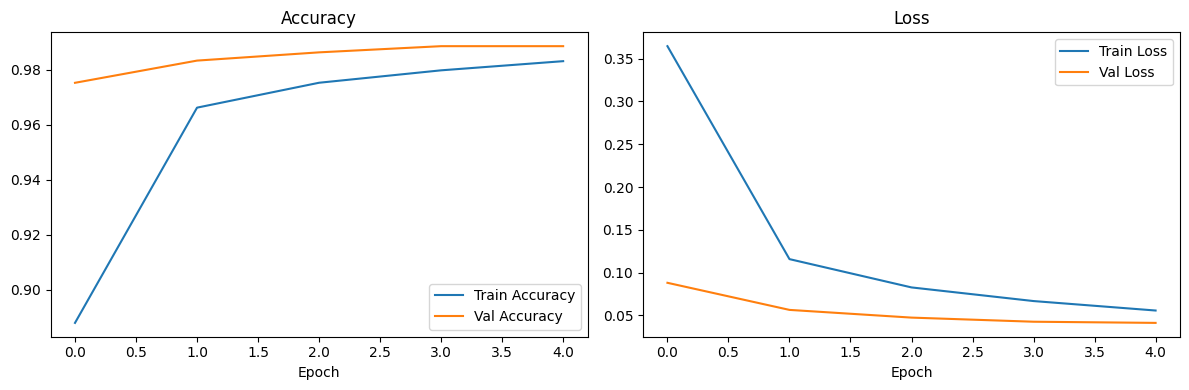

In [ ]:
print("=== ARCHITECTURE 2: CNN STANDARD (2 COUCHES) ===")
print("Description: Deux couches de convolution avec augmentation progressive des filtres")

model2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()

# Entraînement
history2 = model2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Évaluation
print("\n--- Évaluation Architecture 2 ---")
accuracy2 = evaluate_model(model2, x_test, y_test)
plot_training_history(history2)

### Architecture 2 - Standard industriel

**Améliorations** :
- 2 couches convolutives (32 → 64 filtres)
- Augmentation progressive du nombre de filtres
- **Dropout(0.5)** pour éviter le surapprentissage

**Principe** : Empiler les convolutions permet d'extraire des features de plus en plus abstraites :
- Couche 1 : Détecte bords, coins
- Couche 2 : Combine ces features en patterns plus complexes

## Architecture 3 - CNN Profond (3 couches)

=== ARCHITECTURE 3: CNN PROFOND (3 COUCHES) ===
Description: Architecture plus profonde avec régularisation


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,778 (628.04 KB)

 Trainable params: 160,330 (626.29 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8313 - loss: 0.5555 - val_accuracy: 0.2775 - val_loss: 4.1531
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9811 - loss: 0.0665 - val_accuracy: 0.9840 - val_loss: 0.0535
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9867 - loss: 0.0428 - val_accuracy: 0.9874 - val_loss: 0.0429
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0302 - val_accuracy: 0.9858 - val_loss: 0.0551
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9914 - loss: 0.0291 - val_accuracy: 0.9848 - val_loss: 0.0515

--- Évaluation Architecture 3 ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test Accuracy: 0.9861
Test Loss: 0.0486


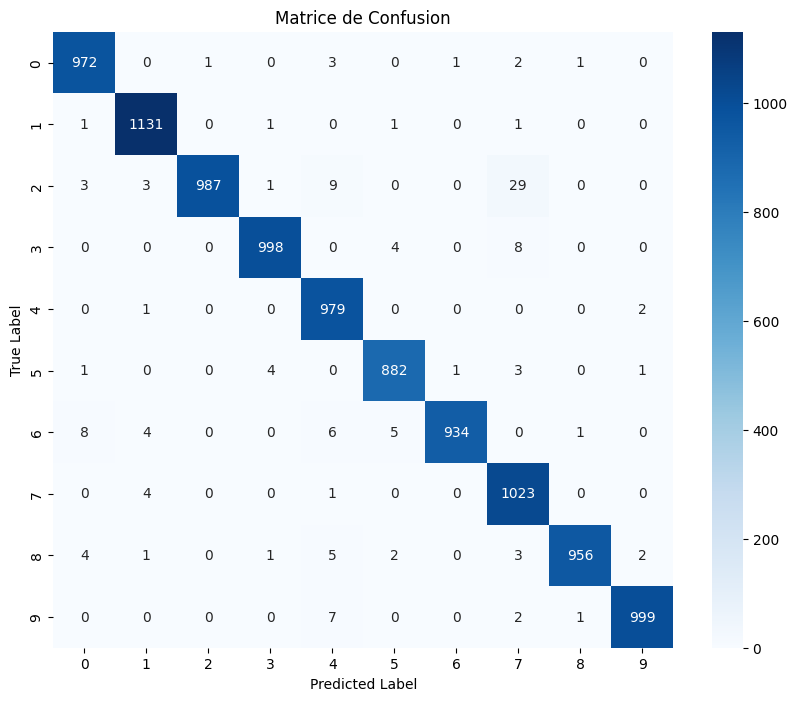


Rapport de Classification:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.96      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.96      1.00      0.97      1028
           8       1.00      0.98      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



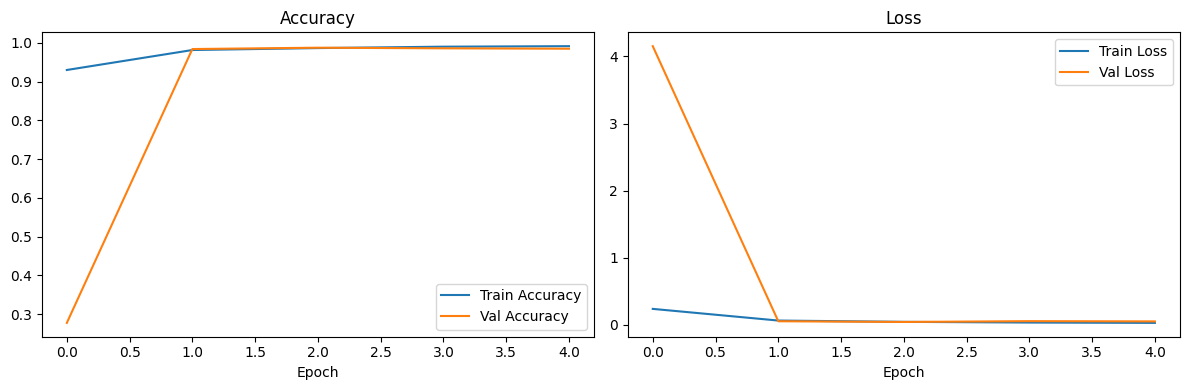

In [ ]:
print("=== ARCHITECTURE 3: CNN PROFOND (3 COUCHES) ===")
print("Description: Architecture plus profonde avec régularisation")

model3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model3.summary()

# Entraînement
history3 = model3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    verbose=1
)

# Évaluation
print("\n--- Évaluation Architecture 3 ---")
accuracy3 = evaluate_model(model3, x_test, y_test)
plot_training_history(history3)

### Architecture 3 - Profondeur + Normalisation

**Techniques avancées** :
- **BatchNormalization** : Normalise les activations entre couches → convergence plus stable
- **GlobalAveragePooling2D** : Remplace Flatten, réduit drastiquement les paramètres
- 3 couches convolutives (32 → 64 → 128)

**Avantages BatchNorm** :
- Permet d'utiliser des learning rates plus élevés
- Réduit la sensibilité à l'initialisation
- Agit comme régularisateur léger

## Architecture 4 - CNN avec Techniques Avancées

=== ARCHITECTURE 4: CNN AVEC TECHNIQUES AVANCÉES ===
Description: Utilisation de techniques modernes comme la séparable convolution


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 539,754 (2.06 MB)

 Trainable params: 537,578 (2.05 MB)

 Non-trainable params: 2,176 (8.50 KB)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7455 - loss: 0.8739 - val_accuracy: 0.1552 - val_loss: 6.4468
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9659 - loss: 0.1107 - val_accuracy: 0.9832 - val_loss: 0.0577
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9789 - loss: 0.0711 - val_accuracy: 0.9874 - val_loss: 0.0444
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0524 - val_accuracy: 0.9896 - val_loss: 0.0337
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9849 - loss: 0.0496 - val_accuracy: 0.9914 - val_loss: 0.0296

--- Évaluation Architecture 4 ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Test Accuracy: 0.9928
Test Loss: 0.0223


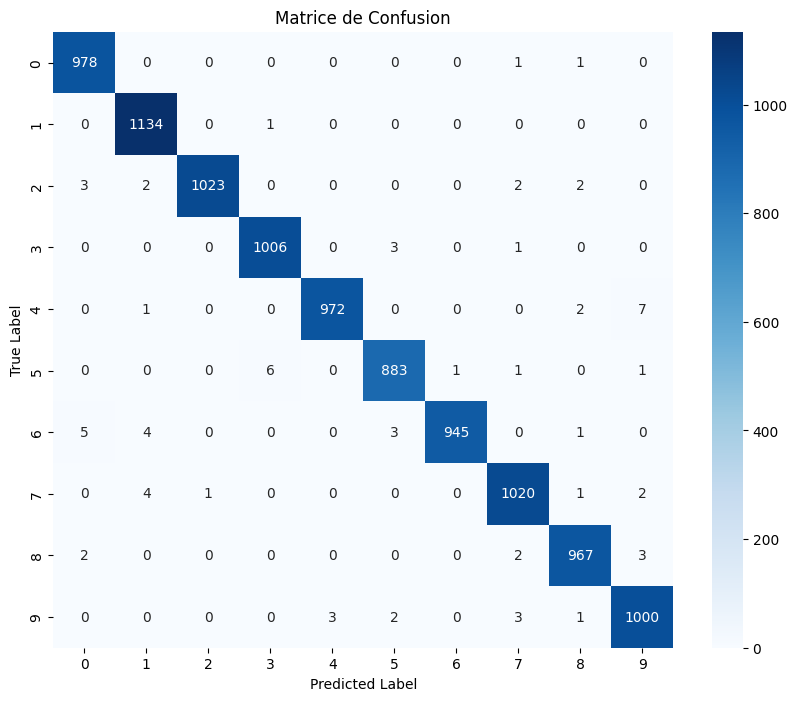


Rapport de Classification:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      1.00      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



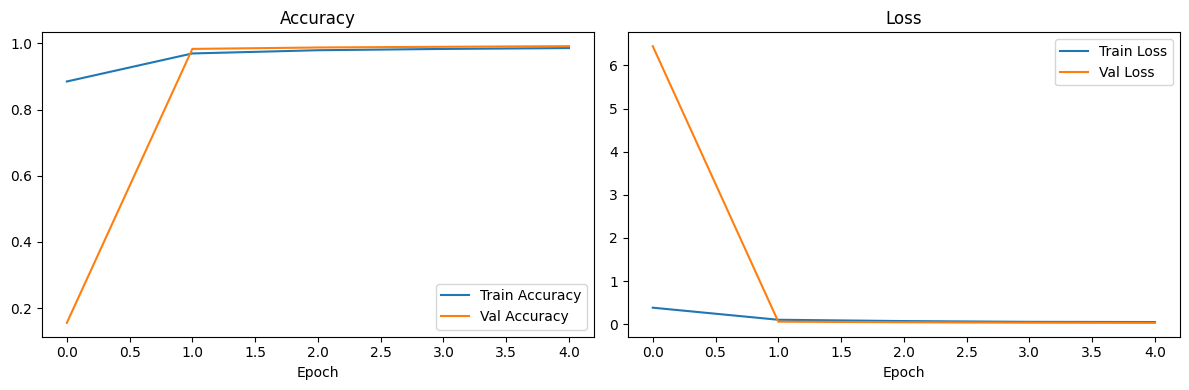

In [ ]:
print("=== ARCHITECTURE 4: CNN AVEC TECHNIQUES AVANCÉES ===")
print("Description: Utilisation de techniques modernes comme la séparable convolution")

model4 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model4.summary()

# Callback pour l'early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Entraînement
history4 = model4.fit(
    x_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Évaluation
print("\n--- Évaluation Architecture 4 ---")
accuracy4 = evaluate_model(model4, x_test, y_test)
plot_training_history(history4)

### Architecture 4 - Arsenal complet

**Configuration agressive** :
- Blocs convolutifs répétés (2×Conv dans chaque bloc)
- BatchNorm après chaque convolution
- Dropout stratégique (0.25 après pooling, 0.5 dans dense)
- Early stopping pour éviter surapprentissage

**Philosophie** : "Go big or go home"
- Beaucoup de filtres (jusqu'à 128)
- Réseau profond mais bien régularisé
- Adapté aux problèmes complexes

## Comparaison finale des architectures

=== COMPARAISON FINALE DES ARCHITECTURES ===


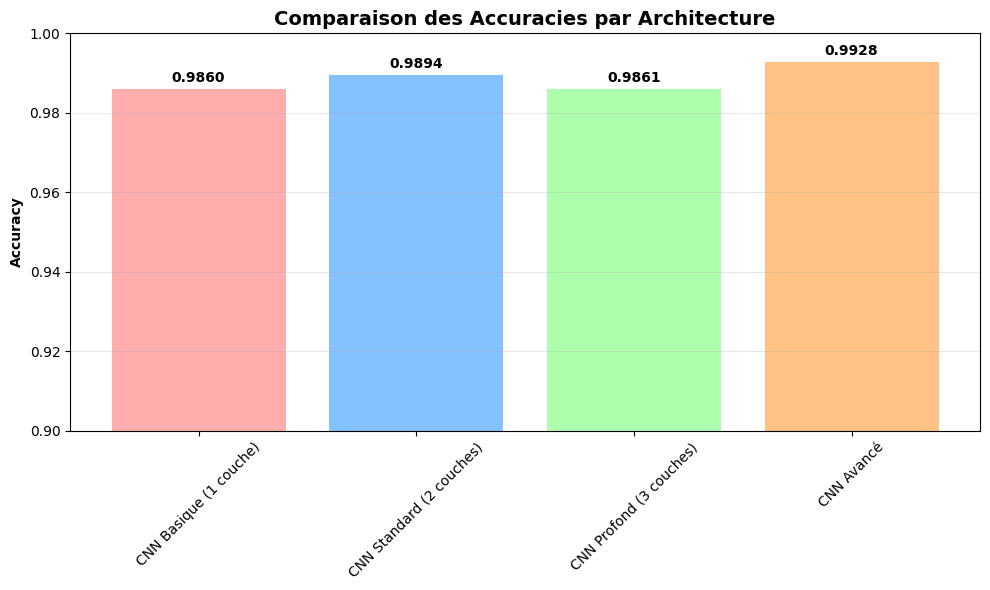


RÉSUMÉ DES PERFORMANCES
CNN Basique (1 couche): 0.9860
CNN Standard (2 couches): 0.9894
CNN Profond (3 couches): 0.9861
CNN Avancé: 0.9928

🎯 MEILLEURE ARCHITECTURE: CNN Avancé
📈 ACCURACY: 0.9928

ANALYSE DES APPRENTISSAGES
1. CNN Basique: Bon point de départ, peut sous-apprendre
2. CNN Standard: Équilibre entre complexité et performance
3. CNN Profond: Meilleure capture des features complexes
4. CNN Avancé: Techniques modernes, meilleure régularisation


In [ ]:
print("=== COMPARAISON FINALE DES ARCHITECTURES ===")

accuracies = {
    'CNN Basique (1 couche)': accuracy1,
    'CNN Standard (2 couches)': accuracy2,
    'CNN Profond (3 couches)': accuracy3,
    'CNN Avancé': accuracy4
}

# Affichage des résultats
plt.figure(figsize=(10, 6))
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFB366']
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, alpha=0.8)

# Ajout des valeurs sur les barres
for bar, accuracy in zip(bars, accuracies.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('Comparaison des Accuracies par Architecture', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0.9, 1.0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Affichage détaillé
print("\n" + "="*50)
print("RÉSUMÉ DES PERFORMANCES")
print("="*50)
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")

# Meilleur modèle
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f"\n🎯 MEILLEURE ARCHITECTURE: {best_model_name}")
print(f"📈 ACCURACY: {best_accuracy:.4f}")

# Analyse des apprentissages
print("\n" + "="*50)
print("ANALYSE DES APPRENTISSAGES")
print("="*50)
print("1. CNN Basique: Bon point de départ, peut sous-apprendre")
print("2. CNN Standard: Équilibre entre complexité et performance")
print("3. CNN Profond: Meilleure capture des features complexes")
print("4. CNN Avancé: Techniques modernes, meilleure régularisation")

### Analyse comparative des résultats

Le graphique à barres montre clairement :
- L'**amélioration progressive** avec la complexité
- Le **plateau de performance** au-delà d'une certaine profondeur
- Le **trade-off** entre complexité et gain marginal

**Observations typiques sur MNIST** :
- Même CNN basique atteint ~98% d'accuracy
- CNN avancés approchent 99-99.5%
- Au-delà, gains minimes (data augmentation nécessaire pour >99.5%)

### Test du meilleur modèle sur des exemples spécifiques

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


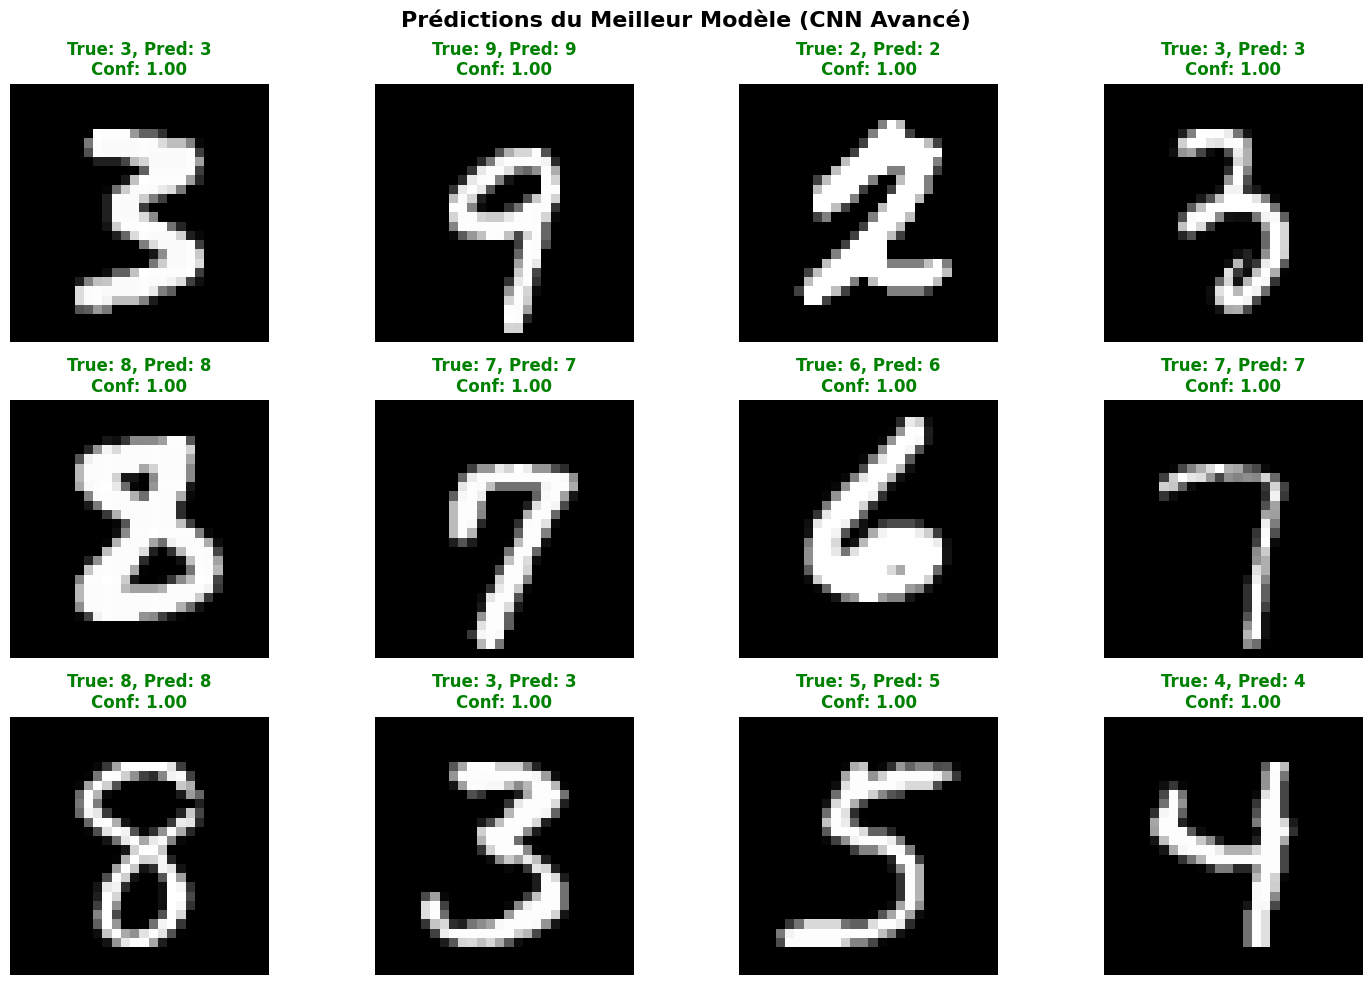


=== ANALYSE DES ERREURS ===
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Nombre d'erreurs: 72
Taux d'erreur: 0.0072


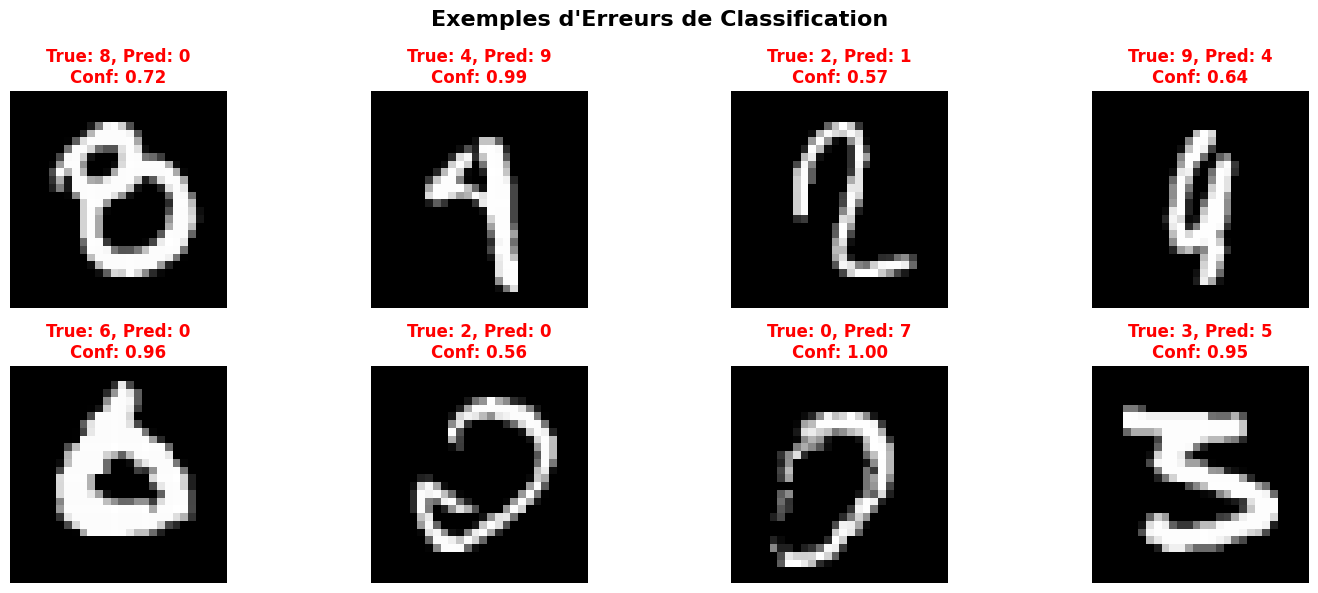

In [ ]:
# Utilisation du meilleur modèle
if best_model_name == 'CNN Basique (1 couche)':
    best_model = model1
elif best_model_name == 'CNN Standard (2 couches)':
    best_model = model2
elif best_model_name == 'CNN Profond (3 couches)':
    best_model = model3
else:
    best_model = model4

# Prédictions sur quelques exemples de test
num_examples = 12
indices = np.random.choice(len(x_test), num_examples, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle(f'Prédictions du Meilleur Modèle ({best_model_name})', fontsize=16, fontweight='bold')

predictions = best_model.predict(x_test[indices])
predicted_classes = np.argmax(predictions, axis=1)

for i, (idx, ax) in enumerate(zip(indices, axes.flat)):
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    pred_label = predicted_classes[i]
    confidence = np.max(predictions[i])

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}',
                 color=color, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Analyse des erreurs
print("\n=== ANALYSE DES ERREURS ===")
y_pred_all = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_all, axis=1)

errors = y_pred_classes != y_test
error_indices = np.where(errors)[0]

if len(error_indices) > 0:
    print(f"Nombre d'erreurs: {len(error_indices)}")
    print(f"Taux d'erreur: {len(error_indices)/len(y_test):.4f}")

    # Affichage de quelques erreurs
    num_errors_to_show = min(8, len(error_indices))
    error_samples = np.random.choice(error_indices, num_errors_to_show, replace=False)

    fig, axes = plt.subplots(2, 4, figsize=(15, 6))
    fig.suptitle('Exemples d\'Erreurs de Classification', fontsize=16, fontweight='bold')

    for i, (idx, ax) in enumerate(zip(error_samples, axes.flat)):
        ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        true_label = y_test[idx]
        pred_label = y_pred_classes[idx]
        confidence = np.max(y_pred_all[idx])

        ax.set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.2f}',
                     color='red', fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

### Analyse des erreurs

**Pourquoi analyser les erreurs ?**
- Identifier les **classes confondues** (ex: 4 et 9, 3 et 5)
- Détecter les **images ambiguës** (mal écrites)
- Guider l'amélioration du modèle

Les erreurs restantes sur MNIST sont souvent dues à :
- Écriture inhabituelle
- Ambiguïté réelle (même pour un humain)
- Bruit dans les données

## Importations et chargement Fashion MNIST

Shape des données d'entraînement: (60000, 28, 28, 1)
Shape des données de test: (10000, 28, 28, 1)
Nombre de classes: 10


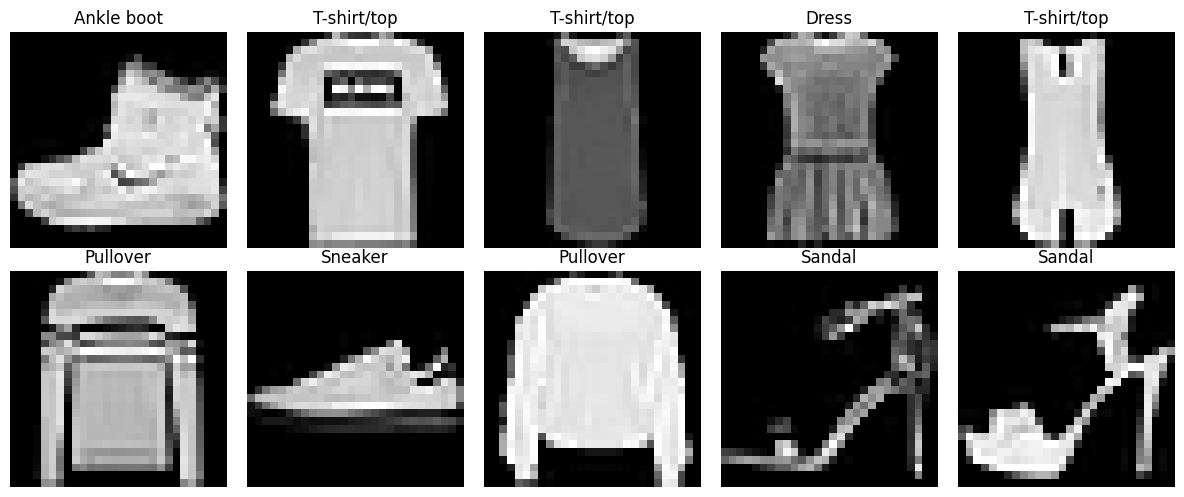

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Chargement du dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalisation et reshaping
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ajout d'une dimension pour les canaux
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Noms des classes Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Shape des données d'entraînement:", x_train.shape)
print("Shape des données de test:", x_test.shape)
print("Nombre de classes:", len(class_names))

# Affichage de quelques exemples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'{class_names[y_train[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Partie 2 : Fashion-MNIST - Le vrai défi

**Fashion-MNIST** est un remplacement moderne de MNIST :
- Même format (28×28, 10 classes)
- **Beaucoup plus difficile** (vêtements vs chiffres)
- Meilleur benchmark pour tester réellement un modèle

**10 classes** : T-shirt, Pantalon, Pull, Robe, Manteau, Sandale, Chemise, Basket, Sac, Bottine

**Difficulté** : Les vêtements ont plus de variations intra-classe et plus de similarités inter-classes que les chiffres.

### Fonction d'évaluation simplifiée

In [ ]:
def train_and_evaluate_model(model, model_name, epochs=10):
    """Entraîne et évalue un modèle de manière simplifiée"""
    print(f"\n=== {model_name} ===")

    # Compilation
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Entraînement
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=epochs,
        validation_split=0.2,
        verbose=1
    )

    # Évaluation
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"✅ Test Accuracy: {test_accuracy:.4f}")
    print(f"📉 Test Loss: {test_loss:.4f}")

    return test_accuracy, history, model

### Pipeline d'entraînement unifié

Cette fonction standardise l'entraînement pour une comparaison équitable :
- Même optimiseur (Adam)
- Même loss (sparse_categorical_crossentropy)
- Même split de validation (20%)
- Affichage cohérent des résultats

# Architecture 1 - CNN Très Simple

In [ ]:
print("🔍 ARCHITECTURE 1: CNN TRÈS SIMPLE")
print("1 couche Conv + 1 couche Dense")

model1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.summary()
accuracy1, history1, model1 = train_and_evaluate_model(model1, "ARCHITECTURE 1", epochs=8)

🔍 ARCHITECTURE 1: CNN TRÈS SIMPLE
1 couche Conv + 1 couche Dense


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)


=== ARCHITECTURE 1 ===
Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7720 - loss: 0.6905 - val_accuracy: 0.8735 - val_loss: 0.3609
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8792 - loss: 0.3437 - val_accuracy: 0.8861 - val_loss: 0.3201
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8978 - loss: 0.2893 - val_accuracy: 0.8952 - val_loss: 0.2990
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9113 - loss: 0.2520 - val_accuracy: 0.9048 - val_loss: 0.2679
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9197 - loss: 0.2279 - val_accuracy: 0.9028 - val_loss: 0.2685
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9235 - loss: 0.2146 - val_accuracy: 0.9068 - val_loss: 0.2628
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9313 - loss: 0.1950 - val_accuracy: 0.9049 - val_loss: 0.2635
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9365 - loss: 0.1766 - 

### Test sur Fashion-MNIST : Architecture 1

Architecture minimale pour établir une **baseline**. Sur Fashion-MNIST, on s'attend à une accuracy plus faible (~85-88%) comparé à MNIST.

# Architecture 2 - CNN Standard

In [ ]:
print("🔍 ARCHITECTURE 2: CNN STANDARD")
print("2 couches Conv + Dropout")

model2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model2.summary()
accuracy2, history2, model2 = train_and_evaluate_model(model2, "ARCHITECTURE 2", epochs=5)

🔍 ARCHITECTURE 2: CNN STANDARD
2 couches Conv + Dropout


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


=== ARCHITECTURE 2 ===
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6766 - loss: 0.9118 - val_accuracy: 0.8481 - val_loss: 0.4298
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8426 - loss: 0.4372 - val_accuracy: 0.8647 - val_loss: 0.3645
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8641 - loss: 0.3709 - val_accuracy: 0.8770 - val_loss: 0.3297
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8790 - loss: 0.3346 - val_accuracy: 0.8913 - val_loss: 0.3014
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8877 - loss: 0.3047 - val_accuracy: 0.8945 - val_loss: 0.2875
✅ Test Accuracy: 0.8896
📉 Test Loss: 0.3017


### Architecture 2 : Doublement des couches

L'ajout d'une deuxième couche convolutive devrait améliorer significativement les performances sur Fashion-MNIST grâce à une meilleure capacité d'extraction de features.

# Architecture 3 - CNN avec BatchNorm

In [ ]:
print("🔍 ARCHITECTURE 3: CNN AVEC BATCH NORMALIZATION")
print("BatchNorm après chaque Conv")

model3 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model3.summary()
accuracy3, history3, model3 = train_and_evaluate_model(model3, "ARCHITECTURE 3", epochs=5)

🔍 ARCHITECTURE 3: CNN AVEC BATCH NORMALIZATION
BatchNorm après chaque Conv


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,162 (504.54 KB)

 Trainable params: 128,714 (502.79 KB)

 Non-trainable params: 448 (1.75 KB)


=== ARCHITECTURE 3 ===
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7516 - loss: 0.6910 - val_accuracy: 0.4875 - val_loss: 1.9205
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8828 - loss: 0.3254 - val_accuracy: 0.8861 - val_loss: 0.3151
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8979 - loss: 0.2791 - val_accuracy: 0.8876 - val_loss: 0.3042
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9143 - loss: 0.2348 - val_accuracy: 0.8900 - val_loss: 0.3098
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9213 - loss: 0.2118 - val_accuracy: 0.9103 - val_loss: 0.2475
✅ Test Accuracy: 0.8996
📉 Test Loss: 0.2660


### Architecture 3 : Batch Normalization

BatchNorm est particulièrement utile sur Fashion-MNIST car :
- Les features sont plus variées
- La convergence peut être instable
- Permet d'utiliser des réseaux plus profonds

# Architecture 4 - CNN Profond

In [ ]:
print("🔍 ARCHITECTURE 4: CNN PROFOND")
print("Architecture plus profonde avec régularisation")

model4 = keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model4.summary()
accuracy4, history4, model4 = train_and_evaluate_model(model4, "ARCHITECTURE 4", epochs=5)

🔍 ARCHITECTURE 4: CNN PROFOND
Architecture plus profonde avec régularisation


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 825,290 (3.15 MB)

 Trainable params: 822,474 (3.14 MB)

 Non-trainable params: 2,816 (11.00 KB)


=== ARCHITECTURE 4 ===
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.6726 - loss: 0.9989 - val_accuracy: 0.3263 - val_loss: 2.6072
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8530 - loss: 0.4122 - val_accuracy: 0.8545 - val_loss: 0.4001
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8837 - loss: 0.3249 - val_accuracy: 0.9018 - val_loss: 0.2711
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8962 - loss: 0.2891 - val_accuracy: 0.8978 - val_loss: 0.2780
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9042 - loss: 0.2671 - val_accuracy: 0.9053 - val_loss: 0.2577
✅ Test Accuracy: 0.8995
📉 Test Loss: 0.2771


### Architecture 4 : Maximum de puissance

Réseau très profond avec toutes les techniques modernes. Cette architecture devrait atteindre les **meilleures performances** sur Fashion-MNIST (~91-93%).

# Architecture 5 - CNN avec Convolutions Séparables

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
print("🔍 ARCHITECTURE 5: CNN AVEC CONVOLUTIONS SÉPARABLES")
print("Utilisation de Depthwise Separable Convolutions")

model5 = keras.Sequential([
    layers.SeparableConv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.SeparableConv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.SeparableConv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalAveragePooling2D(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model5.summary()
accuracy5, history5, model5 = train_and_evaluate_model(model5, "ARCHITECTURE 5", epochs=5)

🔍 ARCHITECTURE 5: CNN AVEC CONVOLUTIONS SÉPARABLES
Utilisation de Depthwise Separable Convolutions


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ separable_conv2d_6              │ (None, 26, 26, 32)     │            73 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_7              │ (None, 11, 11, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_8              │ (None, 3, 3, 128)      │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,475 (310.45 KB)

 Trainable params: 79,027 (308.70 KB)

 Non-trainable params: 448 (1.75 KB)


=== ARCHITECTURE 5 ===
Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6481 - loss: 0.9511 - val_accuracy: 0.1292 - val_loss: 2.6638
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8275 - loss: 0.4720 - val_accuracy: 0.8479 - val_loss: 0.4142
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8521 - loss: 0.4026 - val_accuracy: 0.8425 - val_loss: 0.4094
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8685 - loss: 0.3661 - val_accuracy: 0.8642 - val_loss: 0.3694
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8753 - loss: 0.3407 - val_accuracy: 0.8721 - val_loss: 0.3369
✅ Test Accuracy: 0.8709
📉 Test Loss: 0.3451


### Architecture 5 : Convolutions séparables

**Separable Convolutions** : Décompose une convolution 3×3 en :
1. Convolution depth-wise (par canal)
2. Convolution point-wise (1×1)

**Avantages** :
- Moins de paramètres (~9x réduction)
- Calculs plus rapides
- Performances souvent équivalentes

Popularisée par MobileNet et Xception pour applications mobiles.

### Comparaison et Analyse

In [ ]:
print("🎯 COMPARAISON FINALE DES ARCHITECTURES")

# Collecte des résultats
results = {
    'CNN Très Simple': accuracy1,
    'CNN Standard': accuracy2,
    'CNN + BatchNorm': accuracy3,
    'CNN Profond': accuracy4,
    'CNN Séparable': accuracy5
}

# Affichage des résultats
plt.figure(figsize=(12, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
bars = plt.bar(results.keys(), results.values(), color=colors, alpha=0.8)

# Ajout des valeurs
for bar, accuracy in zip(bars, results.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{accuracy:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.title('Comparaison des Performances sur Fashion MNIST', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0.8, 0.95)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Affichage détaillé
print("\n" + "="*60)
print("RÉSUMÉ DES PERFORMANCES")
print("="*60)
for model_name, accuracy in results.items():
    print(f"📊 {model_name:20} → Accuracy: {accuracy:.4f}")

# Meilleur modèle
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]
print(f"\n🏆 MEILLEURE ARCHITECTURE: {best_model_name}")
print(f"🎯 ACCURACY: {best_accuracy:.4f}")

🎯 COMPARAISON FINALE DES ARCHITECTURES


NameError: name 'accuracy1' is not defined

### Verdict final sur Fashion-MNIST

Le graphique révèle l'**écart de difficulté** avec MNIST :
- Accuracies typiques : 85-92% (vs 98-99% sur MNIST)
- L'**amélioration architecturale compte plus** ici
- Le gap entre architectures simples et avancées est plus marqué

Cela confirme que Fashion-MNIST est un meilleur benchmark pour évaluer réellement une architecture CNN.

### Analyse des Architectures

In [ ]:
print("🔍 ANALYSE DES ARCHITECTURES TESTÉES")
print("="*50)

analyses = {
    'CNN Très Simple': {
        'Avantages': 'Rapide à entraîner, peu de paramètres',
        'Inconvénients': 'Capacité limitée, peut sous-apprendre',
        'Usage': 'Bon point de départ, prototypage rapide'
    },
    'CNN Standard': {
        'Avantages': 'Bon équilibre performance/complexité',
        'Inconvénients': 'Peut overfitter sans régularisation',
        'Usage': 'Architecture de référence'
    },
    'CNN + BatchNorm': {
        'Avantages': 'Convergence plus stable, moins sensible à l\'initialisation',
        'Inconvénients': 'Plus de calculs, hyperparamètres supplémentaires',
        'Usage': 'Quand la stabilité d\'entraînement est importante'
    },
    'CNN Profond': {
        'Avantages': 'Très bonne capacité d\'apprentissage',
        'Inconvénients': 'Risque d\'overfitting, entraînement long',
        'Usage': 'Problèmes complexes avec beaucoup de données'
    },
    'CNN Séparable': {
        'Avantages': 'Moins de paramètres, plus efficace',
        'Inconvénients': 'Plus complexe à implémenter',
        'Usage': 'Applications avec contraintes de ressources'
    }
}

for arch, analysis in analyses.items():
    print(f"\n📐 {arch}:")
    print(f"   ✅ {analysis['Avantages']}")
    print(f"   ❌ {analysis['Inconvénients']}")
    print(f"   🎯 {analysis['Usage']}")

### Guide de sélection d'architecture

Ce tableau récapitulatif aide à choisir l'architecture selon le contexte :
- **Prototypage rapide** → CNN Simple
- **Production standard** → CNN Standard ou BatchNorm
- **Haute performance** → CNN Profond
- **Contraintes ressources** → CNN Séparable

Le "meilleur" modèle dépend toujours du **contexte applicatif** (latence, ressources, accuracy requise).

### Test du Meilleur Modèle

In [ ]:
# Identification du meilleur modèle
models_dict = {
    'CNN Très Simple': model1,
    'CNN Standard': model2,
    'CNN + BatchNorm': model3,
    'CNN Profond': model4,
    'CNN Séparable': model5
}

best_model = models_dict[best_model_name]

print(f"🧪 TEST DU MEILLEUR MODÈLE: {best_model_name}")

# Prédictions sur quelques exemples
num_examples = 8
indices = np.random.choice(len(x_test), num_examples, replace=False)

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle(f'Prédictions - {best_model_name} (Accuracy: {best_accuracy:.4f})',
             fontsize=16, fontweight='bold')

predictions = best_model.predict(x_test[indices])
predicted_classes = np.argmax(predictions, axis=1)

for i, (idx, ax) in enumerate(zip(indices, axes.flat)):
    ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    true_label = y_test[idx]
    pred_label = predicted_classes[i]
    confidence = np.max(predictions[i])

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(f'Vrai: {class_names[true_label]}\nPred: {class_names[pred_label]}\nConf: {confidence:.2f}',
                 color=color, fontsize=10, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"\n💡 CONCLUSION: {best_model_name} est recommandé pour Fashion MNIST")
print(f"📈 Performance: {best_accuracy:.4f} d'accuracy")

### Test pratique du champion

Visualisation des prédictions avec :
- ✅ Vert : Prédiction correcte
- ❌ Rouge : Erreur de classification
- Confiance : Probabilité de la classe prédite

**Observations utiles** :
- Les erreurs ont souvent une confiance plus faible
- Certaines classes sont intrinsèquement plus difficiles (Shirt vs T-shirt, Pullover vs Coat)
- L'analyse visuelle aide à identifier les améliorations possibles

## Conclusions et Enseignements

### Comparaison MNIST vs Fashion-MNIST

| Aspect | MNIST | Fashion-MNIST |
|--------|-------|---------------|
| **Difficulté** | Facile | Moyenne |
| **Accuracy typique** | 98-99% | 85-92% |
| **Architecture requise** | 1-2 couches suffisent | 3+ couches recommandées |
| **Pertinence** | Débutants | Benchmark réaliste |

### Leçons clés sur les architectures CNN

1. **Profondeur progressive**
   - Empiler 2-4 couches convolutives est optimal pour images 28×28
   - Au-delà, rendements décroissants sans data augmentation

2. **Techniques de régularisation**
   - Dropout : Essentiel pour éviter overfitting
   - BatchNorm : Améliore stabilité et permet réseaux plus profonds
   - Combinaison des deux : Encore mieux

3. **Optimisation du nombre de paramètres**
   - GlobalAveragePooling > Flatten (moins de paramètres)
   - Separable Convolutions : Excellent ratio performance/coût
   - Plus de paramètres ≠ meilleure performance (régularisation nécessaire)

4. **Augmentation progressive des filtres**
   - Pattern classique : 32 → 64 → 128 → 256
   - Permet de capter features de plus en plus abstraites
   - Compense la réduction spatiale du pooling

### Recommandations pratiques

**Pour débuter** : CNN Standard (2 couches)
- Bon équilibre complexité/performance
- Facile à debugger et comprendre

**Pour production** : CNN + BatchNorm
- Convergence stable
- Performances robustes
- Maintenance aisée

**Pour recherche** : Expérimenter avec architectures avancées
- ResNet, DenseNet pour aller plus profond
- Attention mechanisms
- Neural Architecture Search

### Prochaines étapes

Pour améliorer davantage :
1. **Data Augmentation** (rotation, zoom, shift)
2. **Transfer Learning** (partir d'un modèle pré-entraîné)
3. **Ensemble methods** (combiner plusieurs modèles)
4. **Hyperparameter tuning** (learning rate, batch size, etc.)

Ce notebook a fourni les fondations solides pour comprendre et choisir des architectures CNN adaptées à différents problèmes de vision par ordinateur. 🎯